<a href="https://colab.research.google.com/github/ShaileshMishr/FaceRecognition/blob/main/Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=71ee3cd0673658a012e5c848f48e5e09e00088e70eb2da95e1abda40977f0934
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [3]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
import math 
%matplotlib inline

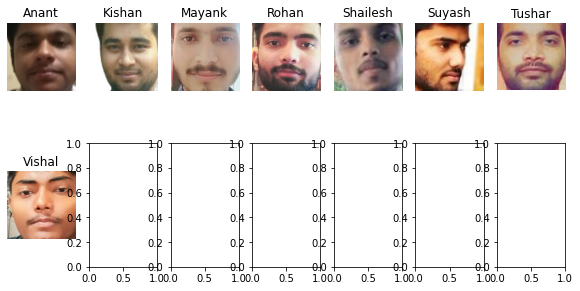

In [9]:
# Create arrays of known face encodings and their names

known_face_images = [
    face_recognition.load_image_file('/content/gdrive/My Drive/face/Known/Anant.jpg'),
    face_recognition.load_image_file('/content/gdrive/My Drive/face/Known/Kishan.jpg'),
    face_recognition.load_image_file('/content/gdrive/My Drive/face/Known/Mayank.jpg'),
    face_recognition.load_image_file('/content/gdrive/My Drive/face/Known/Rohan.jpg'),
    face_recognition.load_image_file('/content/gdrive/My Drive/face/Known/Shailesh.jpg'),
    face_recognition.load_image_file('/content/gdrive/My Drive/face/Known/Suyash.jpg'),
    face_recognition.load_image_file('/content/gdrive/My Drive/face/Known/Tushar.jpg'),
    face_recognition.load_image_file('/content/gdrive/My Drive/face/Known/Vishal.jpg')
]

known_face_names = [
    "Anant",
    "Kishan",
    "Mayank",
    "Rohan",
    "Shailesh",
    "Suyash",
    "Tushar",
    "Vishal"
]    

known_face_encodings = [face_recognition.face_encodings(image)[0] for image in known_face_images]
known_face_locations = [face_recognition.face_locations(image)[0] for image in known_face_images]

columns = 7
rows = math.ceil(len(known_face_names) / columns)
_, ax_tables = plt.subplots(rows, columns, figsize=[10,5])

for index, (top, right, bottom, left) in enumerate(known_face_locations):
    face_img = known_face_images[index][top:bottom, left:right]
    row = math.floor(index / columns)
    name = known_face_names[index]
    column = index % columns
    if rows > 1:
        ax = ax_tables[row][column]
    else:
        ax = ax_tables[column]
    ax.axis('off')
    ax.set_title(name)
    ax.imshow(face_img)


face names: ['Vishal:71.77%', '', 'Kishan:56.15%', 'Rohan:59.22%', '', '', '']


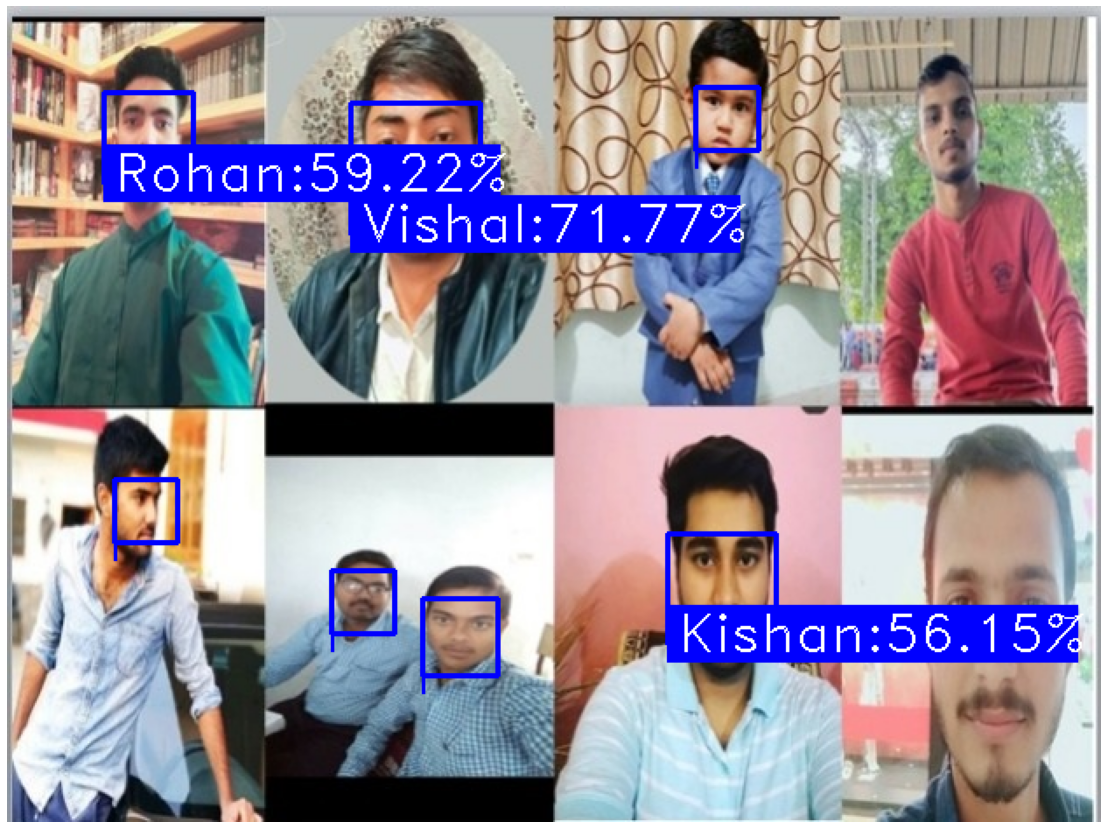

In [14]:
# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
tolerance = 0.47
scale = 1

# while True:
# # Grab a single frame of video
# ret, frame = video_capture.read()

frame = cv2.imread('/content/gdrive/My Drive/face/Unknown/Group.jpg')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
rgb_small_frame = cv2.resize(frame, (0, 0), fx=scale, fy=scale)


# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
# rgb_small_frame = small_frame[:, :, ::-1]

# Only process every other frame of video to save time
# if process_this_frame:
# Find all the faces and face encodings in the current frame of video
face_locations = face_recognition.face_locations(rgb_small_frame)
face_encodings = face_recognition.face_encodings(
    rgb_small_frame, face_locations)

face_names = []
for face_encoding in face_encodings:
    # See if the face is a match for the known face(s)
    distances = face_recognition.face_distance(
        known_face_encodings, face_encoding)
    name = ""
#     print(face_encoding)
#     print(matches)
    # If a match was found in known_face_encodings, just use the first one.
#     if True in matches:
#         first_match_index = matches.index(True)
#         name = known_face_names[first_match_index]
    distance = min(distances)    
    if distance <= tolerance:
        index = [i for i, j in enumerate(distances) if j == distance][0]
        name = known_face_names[index] + ":" + str(round((1-distance) * 100,2)) + "%"
        
    face_names.append(name)

    

print('face names:', face_names)

# process_this_frame = not process_this_frame

# Display the results
for (top, right, bottom, left), name in zip(face_locations, face_names):
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size
    top = round(top / scale)
    right = round(right / scale)
    bottom = round(bottom / scale)
    left = round(left / scale)

    # Draw a box around the face
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
    
    # Draw a label with a name below the face
    font = cv2.FONT_HERSHEY_DUPLEX
    labelSize, baseLine = cv2.getTextSize(
        name, font, 1.0, 1)
    cv2.rectangle(frame, (left, bottom - labelSize[1]),
                  (left + labelSize[0], bottom + baseLine), (0, 0, 255), cv2.FILLED)

    cv2.putText(frame, name, (left + 6, bottom + baseLine - 6),
                font, 1.0, (255, 255, 255), 1)    
    #     print(top,right,bottom,left)

plt.figure(figsize=[20,15])
plt.axis('off')
plt.imshow(frame)